In [1]:
# Imports
from robustpca import ROSL
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Local imports
import hyspec_io, image_render

In [2]:
# Paths
#im_file = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaN-1/4_Rad_Georef_SGC/OlbergholmenN_Pika_L_11-Radiance From Raw Data-Georectify Airborne Datacube.bip.hdr'
im_file = '/mnt/datadisk/Massimal/20210825_Olbergholmen/08-25/OlbergholmenN-11/OlbergholmenN_Pika_L_11.bil.hdr'

In [3]:
# Load image
(im_cube,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(im_file)

In [18]:
# Extract subset
im_subset = im_cube[0:500,0:500,wl<750]

In [19]:
# Create mask indicating non-zero pixels
# nonzero_mask = ~np.all(im_cube==0,axis=2)
nonzero_mask = ~np.all(im_subset==0,axis=2)

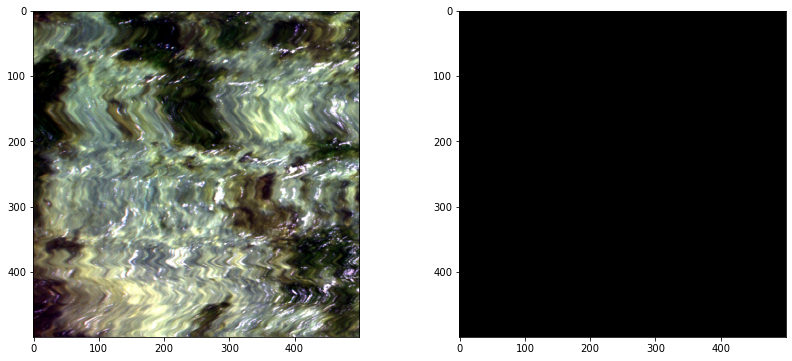

In [20]:
# Show image
fig,ax = plt.subplots(ncols=2,figsize=(14,6))
# ax[0].imshow(image_render.percentile_stretch(im_cube[:,:,rgb_ind]))
ax[0].imshow(image_render.percentile_stretch(im_subset[:,:,rgb_ind]))

ax[1].imshow(nonzero_mask,cmap='gray')

In [21]:
# Extract all non-zero pixels, collect in 2D matrix
# X = im_cube[nonzero_mask]
X = im_subset[nonzero_mask]

In [22]:
# Check matrix shape
X.shape

(250000, 173)

In [23]:
# Normalize X
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

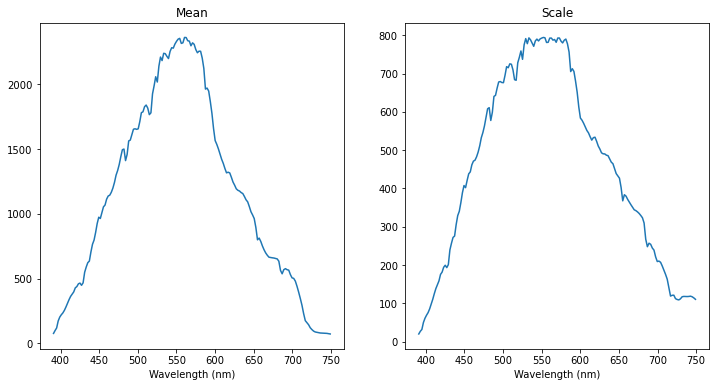

In [25]:
# Plot mean and scale factor as function of wavelength
fig,ax = plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(wl[wl<750],scaler.mean_)
ax[0].set_xlabel('Wavelength (nm)')
ax[0].set_title('Mean')

ax[1].plot(wl[wl<750],scaler.scale_)
ax[1].set_xlabel('Wavelength (nm)')
ax[1].set_title('Scale')
plt.show()

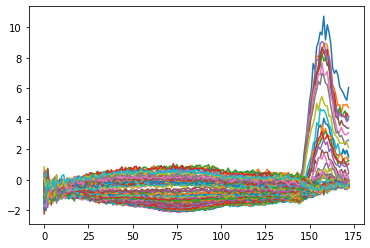

In [26]:
plt.plot(X_sc[0:100,:].transpose())
plt.show()

In [46]:
# Create robust PCA model
rosl = ROSL(n_components=10,lambda1=0.0001)

In [47]:
# Fit model
# If the data set is too large, this seems to kill the kernel (too high memory usage?)
#rosl.fit(X)
y = rosl.fit_transform(X_sc)

In [48]:
# View number of components. Seems to always be equal to one(?).
rosl.n_components_

1

In [30]:
y.shape

(250000, 1)

In [31]:
rosl.components_.shape

(1, 173)

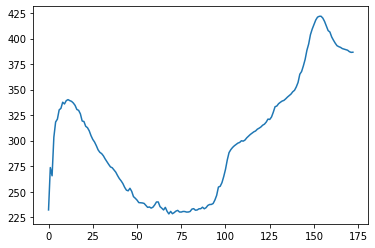

In [32]:
plt.plot(np.transpose(rosl.components_))

In [34]:
y_im = np.zeros((im_subset.shape[0],im_subset.shape[1],y.shape[1]))
y_im[nonzero_mask] = y

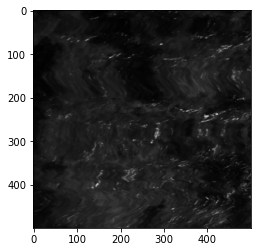

In [35]:
plt.imshow(y_im,cmap='gray')

In [36]:
error_im = np.zeros(im_subset.shape)
error_im[nonzero_mask] = rosl.error_

In [42]:
rosl.lambda1

0.01